## Import libraries

In [1]:
## importing libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt

## Initialization

In [2]:
## image dimensions
img_w, img_h = 150, 150

## data set directory
train_data_dir = r'..\Data\train'
validation_data_dir = r'..\Data\validation'

## epochs
epochs = 50

## batch Size
batch_size = 32

## define where the 'channels' dimension is in input data
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_w, img_h)
else:
    input_shape = (img_w, img_h, 3)

## Model

In [3]:
## model type
model = Sequential()

##layer 1
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##layer 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##layer 3
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##layer 4
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

## Data Preprocessing

In [4]:
## data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255, 
                                   shear_range=0.3,
                                   zoom_range= 0.2, 
                                   horizontal_flip=True, 
                                   rotation_range=20)

test_datagen = ImageDataGenerator(rescale=1. / 255)

## train data
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_w, img_h),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

## validation data
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_w, img_h),
                                                        batch_size=batch_size,
                                                        class_mode='binary')


Found 1700 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Model Train/Validation

Epoch 1/50
54/54 [==============================] - 13s 158ms/step - loss: 0.6979 - accuracy: 0.4906 - val_loss: 0.6925 - val_accuracy: 0.5700
Epoch 2/50
54/54 [==============================] - 7s 137ms/step - loss: 0.6918 - accuracy: 0.5153 - val_loss: 0.6896 - val_accuracy: 0.5500
Epoch 3/50
54/54 [==============================] - 7s 135ms/step - loss: 0.6877 - accuracy: 0.5353 - val_loss: 0.6867 - val_accuracy: 0.5140
Epoch 4/50
54/54 [==============================] - 7s 137ms/step - loss: 0.6836 - accuracy: 0.5594 - val_loss: 0.6796 - val_accuracy: 0.5580
Epoch 5/50
54/54 [==============================] - 8s 138ms/step - loss: 0.6808 - accuracy: 0.5641 - val_loss: 0.6928 - val_accuracy: 0.5340
Epoch 6/50
54/54 [==============================] - 7s 137ms/step - loss: 0.6737 - accuracy: 0.5906 - val_loss: 0.6776 - val_accuracy: 0.5520
Epoch 7/50
54/54 [==============================] - 7s 138ms/step - loss: 0.6714 - accuracy: 0.5994 - val_loss: 0.6814 - val_accuracy: 0.5600
Epoch

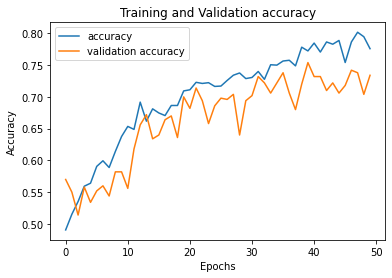

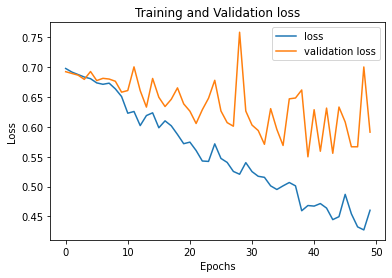

In [5]:
## training and testing model with the data set
history = model.fit(train_generator,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = validation_generator)

## plot accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.legend(['accuracy','validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## plot loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.legend(['loss','validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## saving the weights of model
model.save_weights('model_weights.h5')